<a href="https://colab.research.google.com/github/Holardiplenty123/Data-Analyst-Portfolio/blob/main/Task_Solution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Option to display all rows
pd.set_option('display.max_rows', None)

# Loading the Excel file
df = pd.read_excel('Telco_Customer_Churn_Dataset.xlsx')

# data cleaning and preparation
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

In [ ]:
#  To Show first 10 rows
display(df.head(10))

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# This is now handled in the first cell, so this cell is redundant.
# df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
df[df['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [ ]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
# This is now handled in the first cell, so this cell is redundant.
# df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
print(df.columns)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [ ]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.mean(numeric_only=True)

,0
seniorcitizen,0.162147
tenure,32.371149
monthlycharges,64.761692
totalcharges,2279.734304


In [ ]:
df.median(numeric_only=True)

,0
seniorcitizen,0.00
tenure,29.00
monthlycharges,70.35
totalcharges,1394.55


In [ ]:
df.mode().iloc[0]


,0
customerid,0002-ORFBO
gender,Male
seniorcitizen,0.0
partner,No
dependents,No
tenure,1.0
phoneservice,Yes
multiplelines,No
internetservice,Fiber optic
onlinesecurity,No


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')


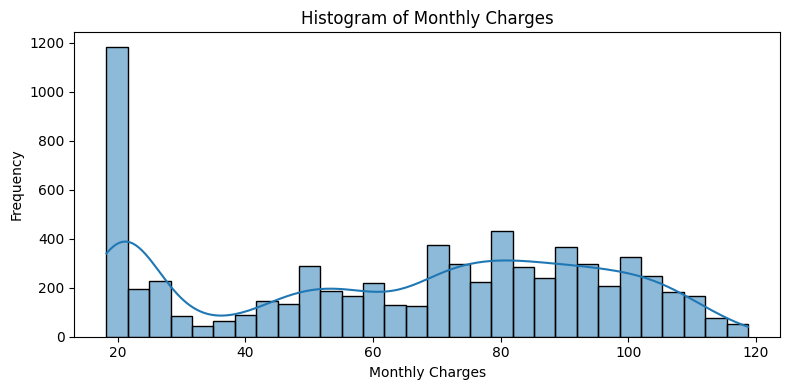

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['monthlycharges'], bins=30, kde=True)
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

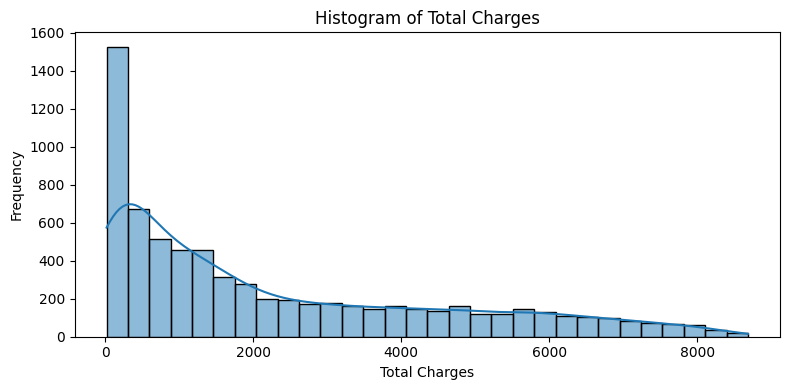

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['totalcharges'], bins=30, kde=True)
plt.title('Histogram of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


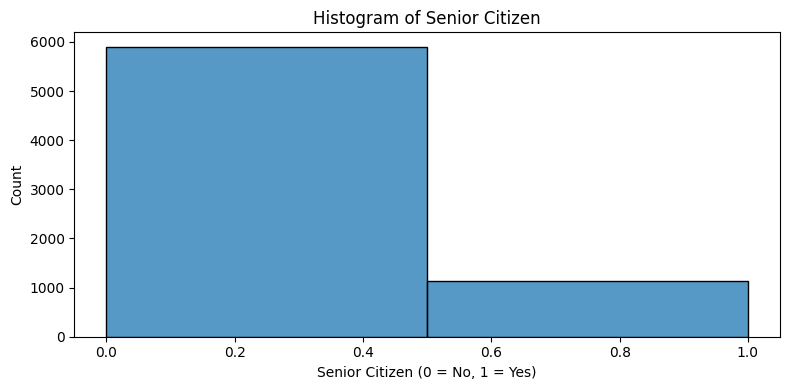

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['seniorcitizen'], bins=2)
plt.title('Histogram of Senior Citizen')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


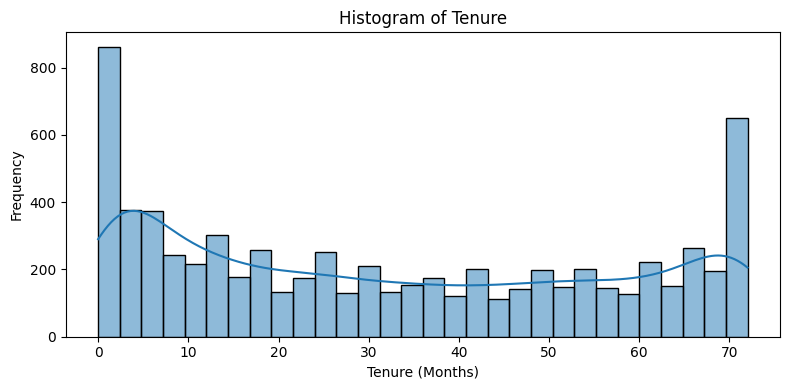

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


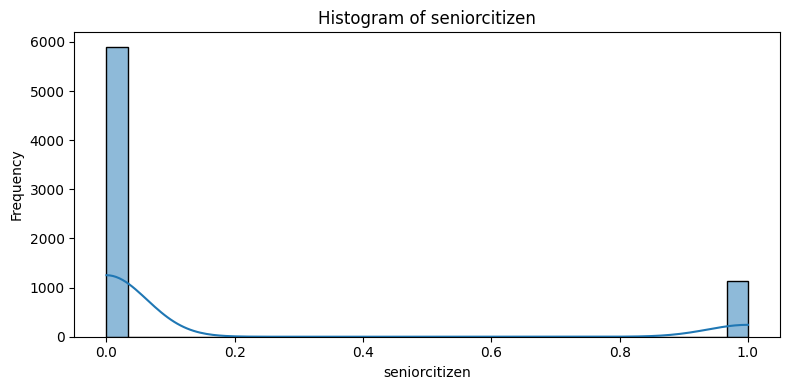

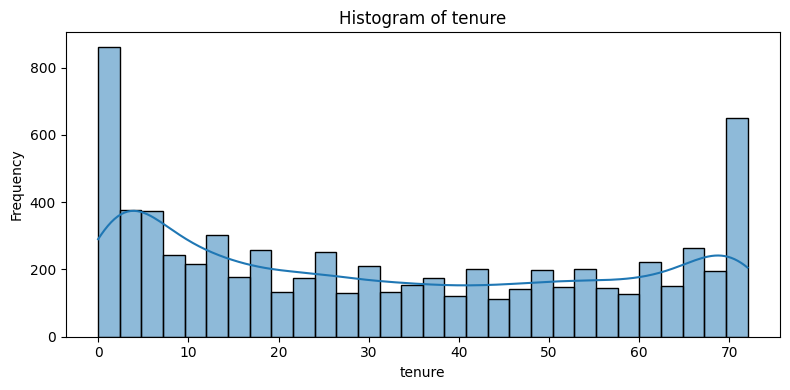

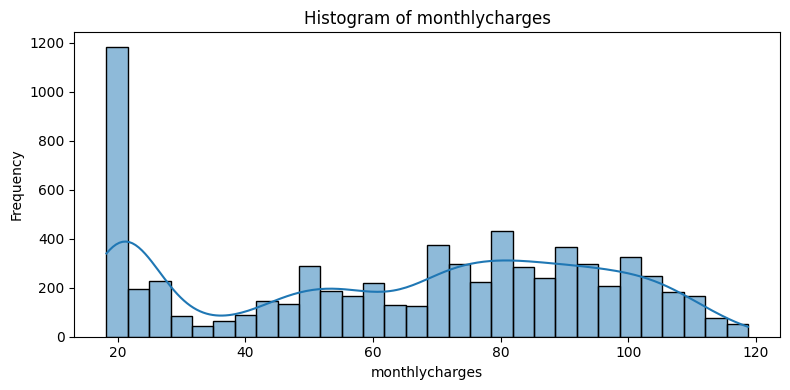

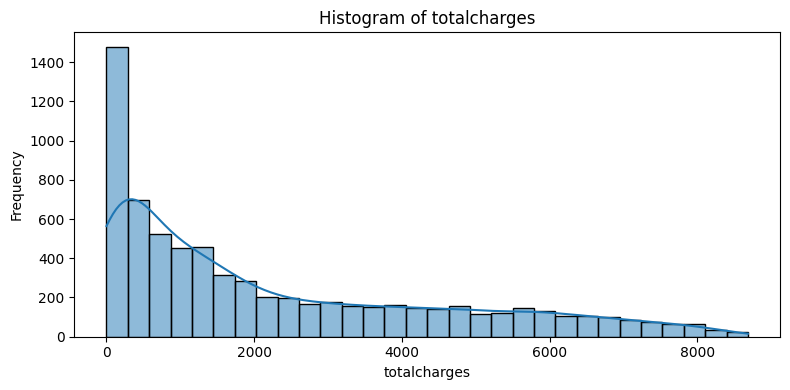

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

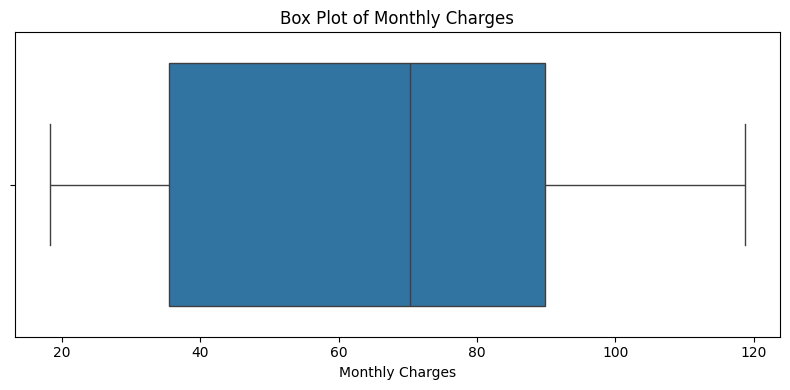

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['monthlycharges'])
plt.title('Box Plot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.tight_layout()
plt.show()

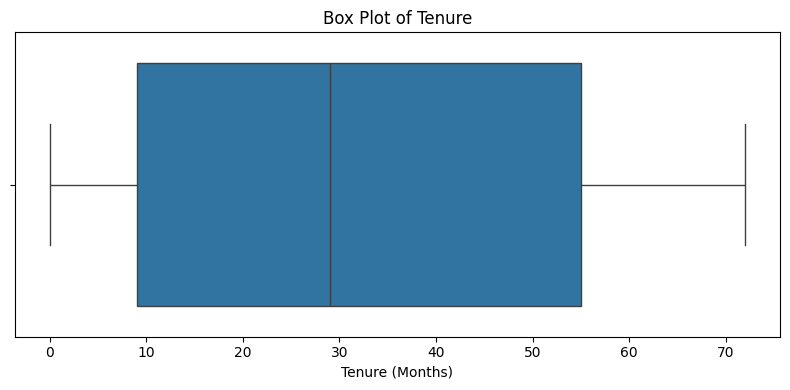

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')
plt.xlabel('Tenure (Months)')
plt.tight_layout()
plt.show()

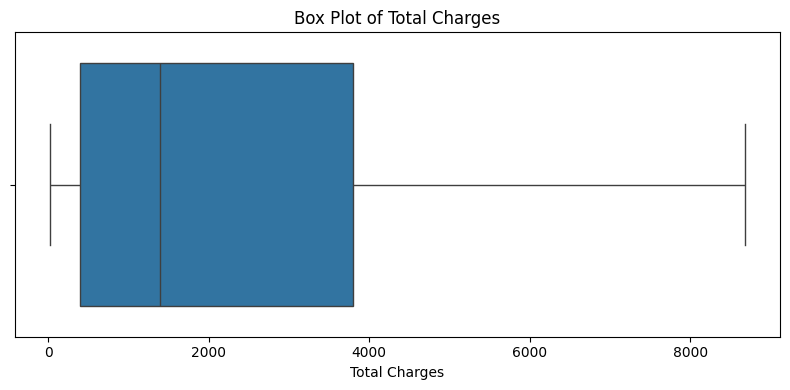

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['totalcharges'])
plt.title('Box Plot of Total Charges')
plt.xlabel('Total Charges')
plt.tight_layout()
plt.show()


In [ ]:
# This is now handled in the first cell, so this cell is redundant.
# df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df['churn'].value_counts(normalize=True) * 100


,proportion
churn,
0,73.463013
1,26.536987


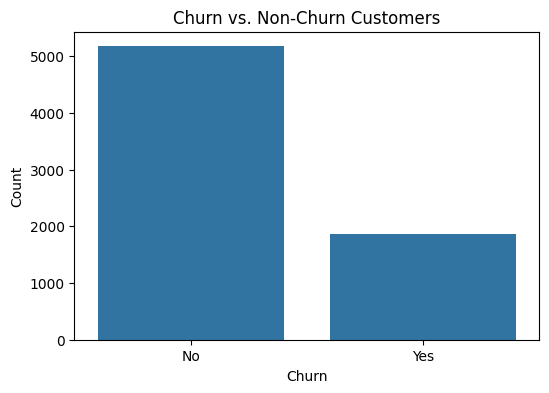

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title('Churn vs. Non-Churn Customers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


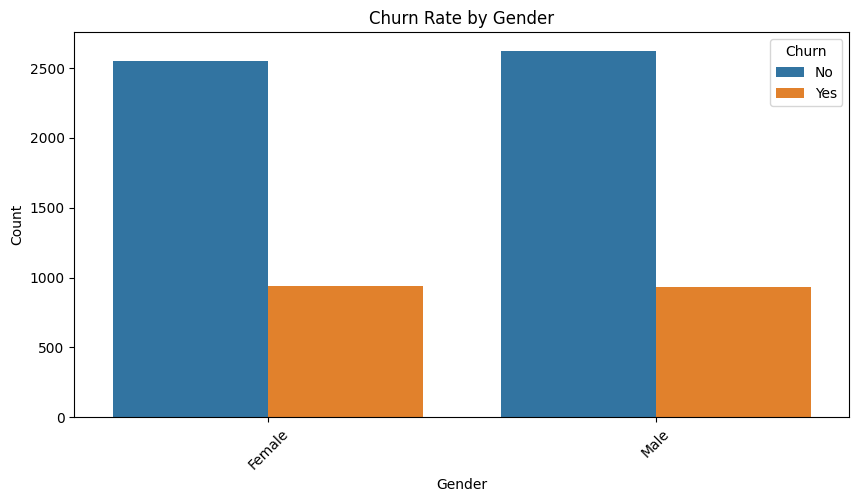

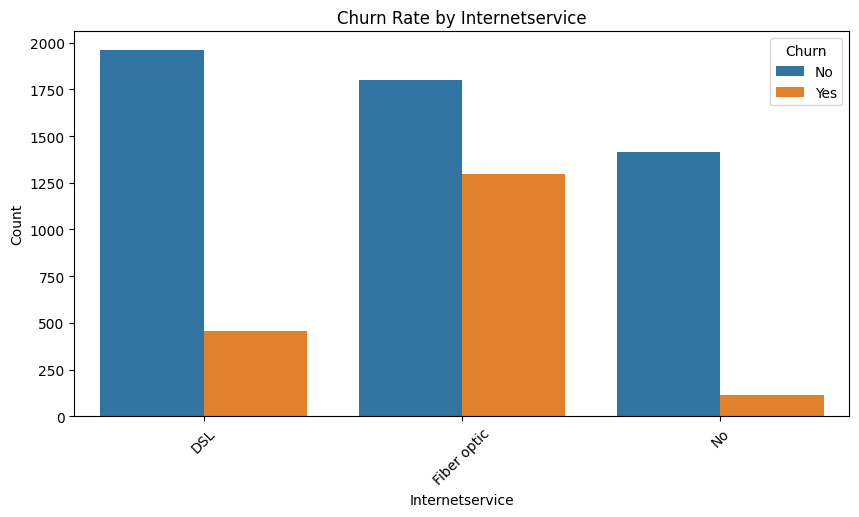

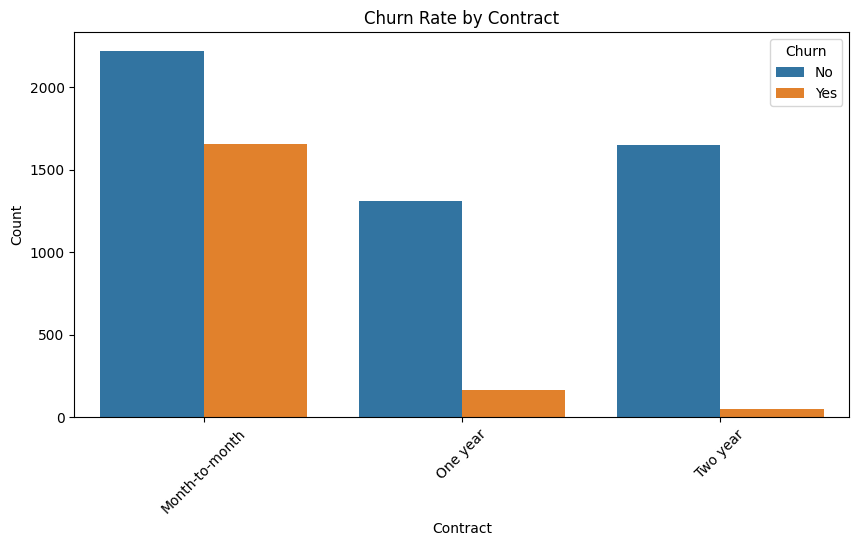

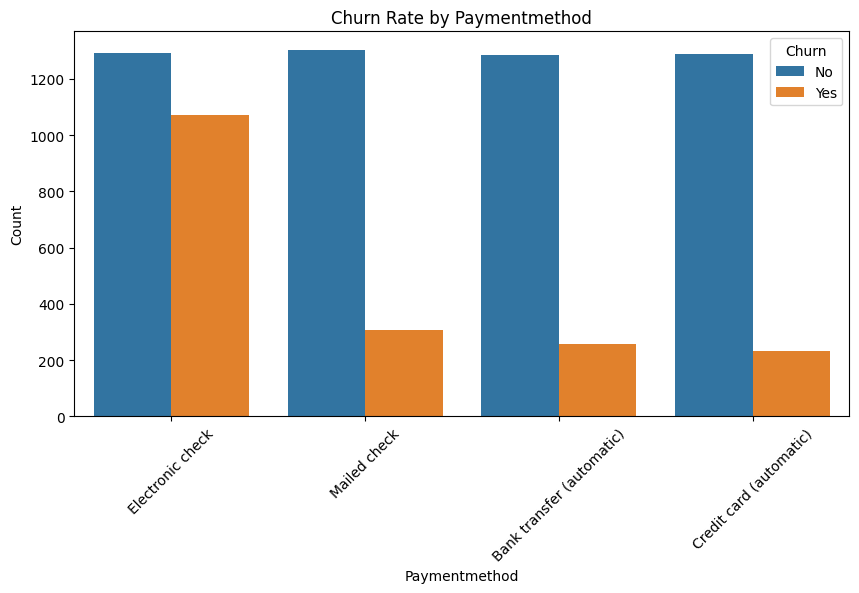

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

# We'll exclude customerid from our plots
for col in ['gender', 'internetservice', 'contract', 'paymentmethod']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f'Churn Rate by {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

In [ ]:
# This is now handled in the first cell, so this cell is redundant.
# # Create tenure categories
# df['tenure_group'] = pd.cut(
#     df['tenure'],
#     bins=[0, 12, 36, df['tenure'].max()],
#     labels=['0–12 months', '13–36 months', '37+ months'],
#     include_lowest=True
# )

In [ ]:
tenure_counts = df['tenure_group'].value_counts()

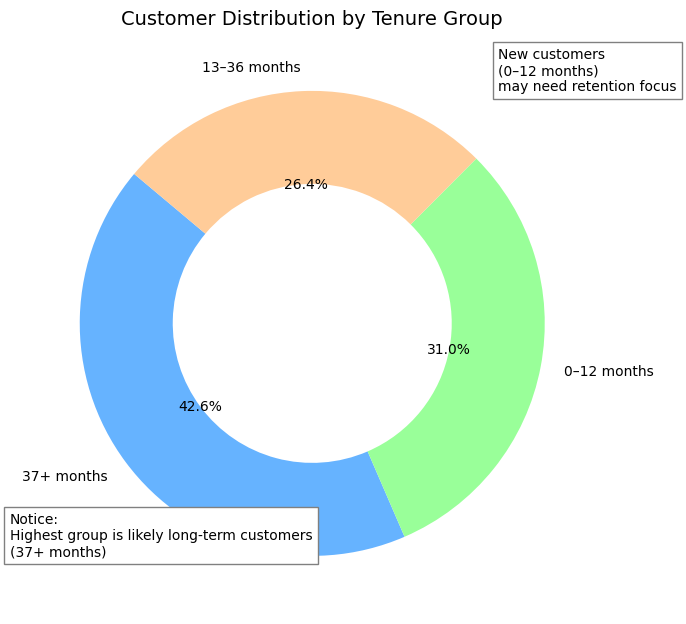

In [ ]:
import matplotlib.pyplot as plt

tenure_counts = df['tenure_group'].value_counts()
colors = ['#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    tenure_counts,
    labels=tenure_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
plt.title('Customer Distribution by Tenure Group', fontsize=14)
plt.text(-1.3, -1.0, 'Notice:\nHighest group is likely long-term customers\n(37+ months)', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'))
plt.text(0.8, 1.0, 'New customers\n(0–12 months)\nmay need retention focus', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'))
plt.tight_layout()
plt.show()

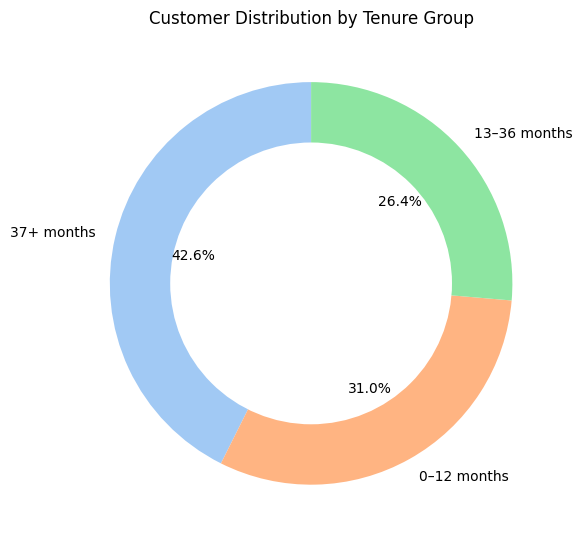

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Customer Distribution by Tenure Group')
plt.tight_layout()
plt.show()

In [ ]:
# This is now handled in the first cell, so this cell is redundant.
# df['tenure_group'] = pd.cut(
#     df['tenure'],
#     bins=[0, 12, 36, df['tenure'].max()],
#     labels=['0–12 months', '13–36 months', '37+ months'],
#     include_lowest=True
# )

In [ ]:
grouped_data = df.groupby('tenure_group')['monthlycharges'].mean().reset_index()

/tmp/ipython-input-2000043524.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('tenure_group')['monthlycharges'].mean().reset_index()


/tmp/ipython-input-3719483466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='tenure_group', y='monthlycharges', palette='pastel')


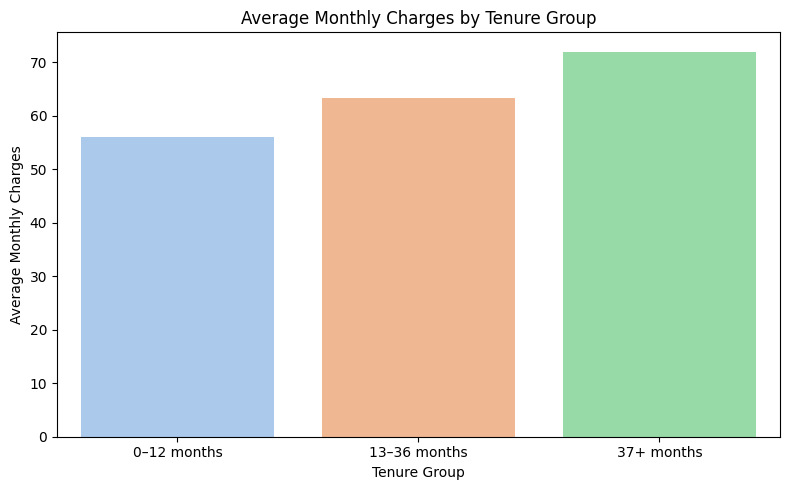

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_data, x='tenure_group', y='monthlycharges', palette='pastel')
plt.title('Average Monthly Charges by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Average Monthly Charges')
plt.tight_layout()
plt.show()


In [ ]:
# This is now handled in the first cell, so this cell is redundant.
# df['tenure_group'] = pd.cut(
#     df['tenure'],
#     bins=[0, 12, 36, df['tenure'].max()],
#     labels=['0–12 months', '13–36 months', '37+ months'],
#     include_lowest=True
# )

In [ ]:
avg_monthly = df.groupby('tenure_group', observed=False)['monthlycharges'].mean().reset_index()

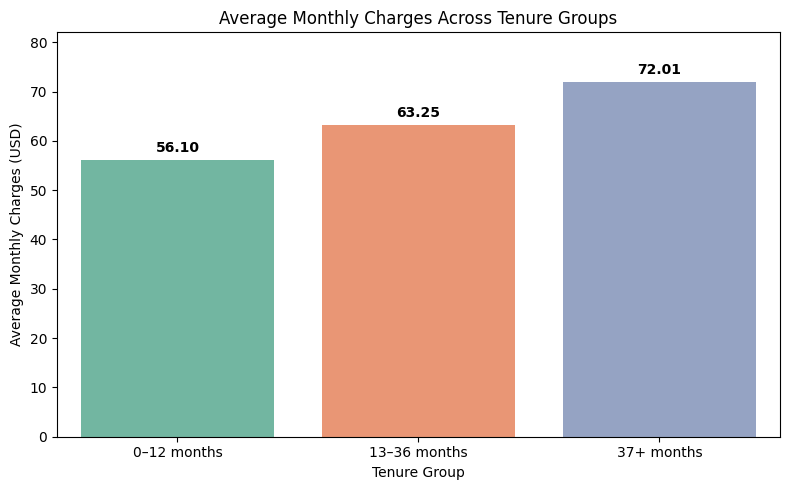

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
bars = sns.barplot(x='tenure_group', y='monthlycharges', data=avg_monthly, hue='tenure_group', palette='Set2', legend=False)

# Add value annotations on each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Average Monthly Charges Across Tenure Groups')
plt.xlabel('Tenure Group')
plt.ylabel('Average Monthly Charges (USD)')
plt.ylim(0, avg_monthly['monthlycharges'].max() + 10)
plt.tight_layout()
plt.show()

In [ ]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0–12 months'
    elif 13 <= tenure <= 36:
        return '13–36 months'
    else:
        return '37+ months'

df['tenure_group'] = df['tenure'].apply(tenure_group)

NameError: name 'df' is not defined

In [ ]:
# Convert churn to numeric
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

# Group by tenure_group and calculate mean stats
group_stats = df.groupby('tenure_group', observed=False).agg({
    'monthlycharges': ['mean', 'median'],
    'totalcharges': ['mean', 'median'],
    'churn': ['mean', 'count']
}).reset_index()

# Optional: rename columns for clarity
group_stats.columns = ['Tenure Group',
                       'MonthlyCharges_Mean', 'MonthlyCharges_Median',
                       'TotalCharges_Mean', 'TotalCharges_Median',
                       'Churn_Rate', 'Customer_Count']

print(group_stats)

   Tenure Group  MonthlyCharges_Mean  MonthlyCharges_Median  \
0   0–12 months            56.097781                 55.900   
1  13–36 months            63.248195                 69.675   
2    37+ months            72.008730                 80.300   

   TotalCharges_Mean  TotalCharges_Median  Churn_Rate  Customer_Count  
0         276.621563              172.850    0.474382            2186  
1        1513.541756             1404.975    0.255388            1856  
2        4213.723192             4282.400    0.119294            3001  


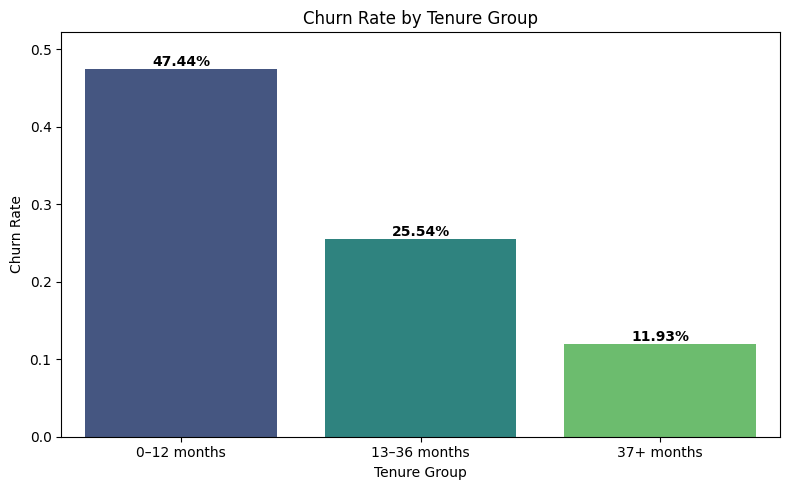

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
bars = sns.barplot(x='Tenure Group', y='Churn_Rate', data=group_stats, hue='Tenure Group', palette='viridis', legend=False)

# Add value annotations on each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2%}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.ylim(0, group_stats['Churn_Rate'].max() * 1.1)
plt.tight_layout()
plt.show()

In [ ]:
# This is now handled in the first cell, so this cell is redundant.
# # If churn is still object, convert it
# df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
churn_by_gender = df.groupby('gender')['churn'].mean().reset_index()
churn_by_gender.columns = ['Gender', 'Churn Rate']
print(churn_by_gender)

   Gender  Churn Rate
0  Female         0.0
1    Male         0.0


In [ ]:
churn_by_payment = df.groupby('paymentmethod')['churn'].mean().reset_index()
churn_by_payment.columns = ['Payment Method', 'Churn Rate']
print(churn_by_payment)

              Payment Method  Churn Rate
0  Bank transfer (automatic)         0.0
1    Credit card (automatic)         0.0
2           Electronic check         0.0
3               Mailed check         0.0


In [ ]:
churn_by_contract = df.groupby('contract')['churn'].mean().reset_index()
churn_by_contract.columns = ['Contract Type', 'Churn Rate']
print(churn_by_contract)

    Contract Type  Churn Rate
0  Month-to-month         0.0
1        One year         0.0
2        Two year         0.0


In [ ]:
churn_by_contract = df.groupby('contract')['churn'].mean().reset_index()
churn_by_contract.columns = ['Contract Type', 'Churn Rate']
print(churn_by_contract)

    Contract Type  Churn Rate
0  Month-to-month         0.0
1        One year         0.0
2        Two year         0.0


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Telco_Customer_Churn_Dataset.xlsx to Telco_Customer_Churn_Dataset.xlsx
User uploaded file "Telco_Customer_Churn_Dataset.xlsx" with length 1426533 bytes


In [ ]:
# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 36, 72], labels=['0-12', '13-36', '37+'])

# Group by tenure group and compute average charges and churn rate
tenure_analysis = df.groupby('tenure_group', observed=False).agg({
    'monthlycharges': 'mean',
    'totalcharges': 'mean',
    'churn': 'mean'  # churn rate
}).reset_index()

print(tenure_analysis)

  tenure_group  monthlycharges  totalcharges     churn
0         0-12       56.172023    276.621563  0.476782
1        13-36       63.248195   1513.541756  0.255388
2          37+       72.008730   4213.723192  0.119294


In [ ]:
# Churn rate by gender
gender_churn = df.groupby('gender')['churn'].value_counts(normalize=True).unstack()
print(gender_churn)

# Churn rate by senior citizen status
senior_churn = df.groupby('seniorcitizen')['churn'].value_counts(normalize=True).unstack()
print(senior_churn)

churn          0         1
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603
churn                 0         1
seniorcitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


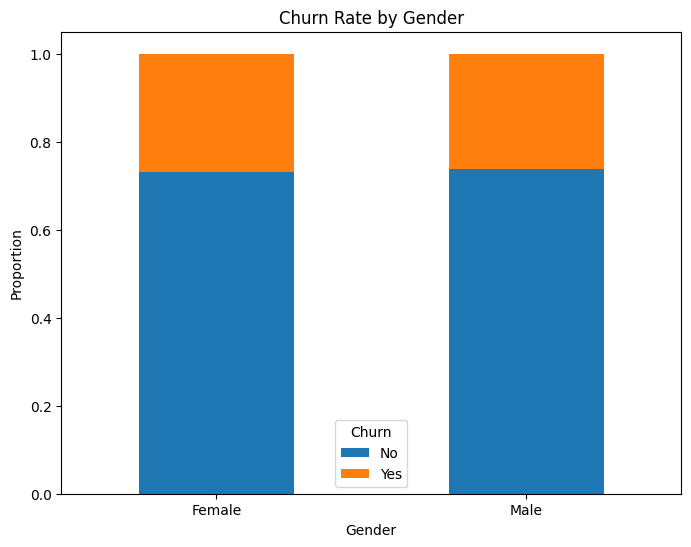

In [ ]:
# Churn rate by gender
gender_churn.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

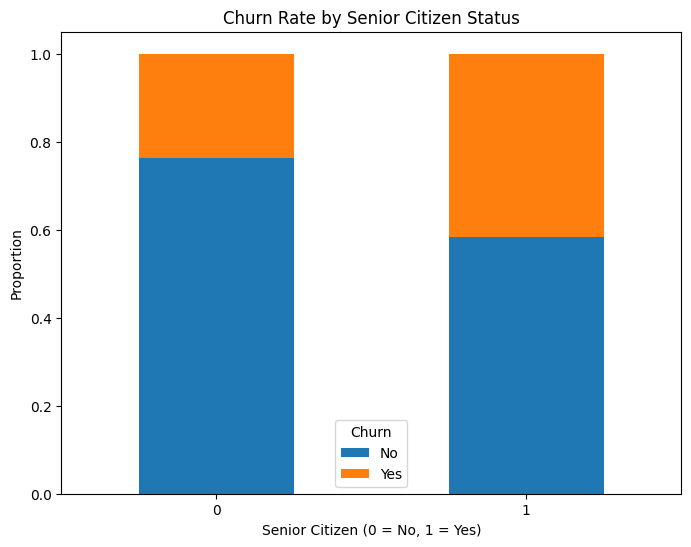

In [ ]:
# Churn rate by senior citizen status
senior_churn.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

churn                             0         1
paymentmethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


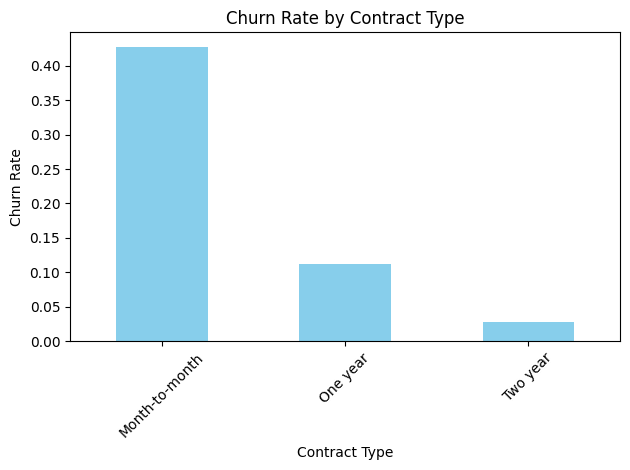

In [ ]:
# Churn rate by payment method
payment_churn = df.groupby('paymentmethod')['churn'].value_counts(normalize=True).unstack()
print(payment_churn)

# Churn rate by contract type (barplot)
import seaborn as sns
import matplotlib.pyplot as plt

contract_churn = df.groupby('contract')['churn'].value_counts(normalize=True).unstack()
contract_churn[1].plot(kind='bar', color='skyblue')

plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

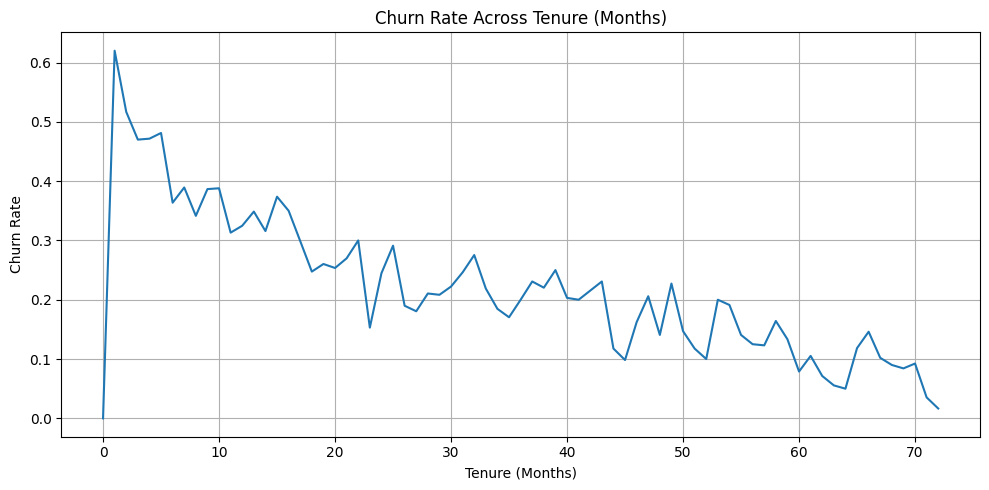

In [ ]:
# Line plot of churn rate over tenure
tenure_churn = df.groupby('tenure')['churn'].apply(lambda x: (x == 1).mean())

plt.figure(figsize=(10,5))
tenure_churn.plot()
plt.title('Churn Rate Across Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})